# PREGUNTA 3

Implementa un modelo de clasiﬁcación para este conjunto de datos usando el método Decision Tree. Usa el 75% de los datos para el entrenamiento y el 25% para las pruebas.

a. ¿Es recomendable estandarizar los datos antes de usar este método de clasiﬁcación? (contesta en el cuadernillo)

b. Determina el criterio de división en los nodos y los parámetros que proporcionan los mejores resultados en términos de precisión. Indica la precisión que se ha alcanzado. (contesta en el cuadernillo)

c. Determina la caracterı́stica de los datos que el algoritmo ha seleccionado para la división en el nodo raı́z. (contesta en el cuadernillo)

d. ¿Cuál es el valor de la variable de salida si el vector de caracterı́sticas de entrada es [1, 3, 1, 2, 3, 2]? (contesta en el cuadernillo)

Deposita el código Python en Aula Virtual en el ﬁchero 'answer3.ipynb'.

RESPUESTA

a.

No, no es necesario estandarizar los datos antes de usar el método Decision Tree. Esto se debe a que los árboles de decisión no dependen de la escala de los datos, ya que evalúan divisiones basadas en umbrales relativos en lugar de distancias entre puntos. Por lo tanto, trabajar con datos en su escala original no afecta al rendimiento del modelo.

b.

El criterio de división utilizado en este modelo es 'gini', encargado de medir la pureza de los nodos, al cual se le han introducido los siguientes parámetros que proporcionan buenos resultados en términos de precisión:

- max_depth = 10: Indica la profundidad máxima del árbol, además de controlar la complejidad y el sobreajuste.

- random_state = 1: Asegura la reproducibilidad de los resultados.

Con estos valores de los parámetros, se ha obtenido una precisión de 0.981 (98.1 %).

c.

Para identificar la característica seleccionada en el nodo raíz, se utiliza el método feature_importances_ de tree_model, el cual nos indica que la característca seleccionada en el nodo raíz es 'Col2'.

d.

El valor de salida predicho por el modelo SVM para el vector [1, 3, 1, 2, 3, 2] es de 1 para la clase 1, 0 para la clase 2, 0 para la clase 3 y 0 para la clase 4, siendo la clase 1 la más probable.

---

# Configuración y Visualización del Entorno

## Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [26]:
import sys
sys.path.insert(0, '..')

## Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [27]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'mlxtend' : '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# Código Fuente

In [29]:
columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Target']
df = pd.read_csv("dataset_classification.csv", 
                 sep=',',
                 usecols=columns)

In [30]:
dataset_classification_anonymized = df.drop(["Target"], axis=1)
dataset_classification_anonymized.to_csv('dataset_classification_anonymized.csv', index=False)
dataset_classification_anonymized.corr()

,Col1,Col2,Col3,Col4,Col5,Col6
Col1,1.000000e+00,-7.136661e-17,9.276252e-17,2.241006e-17,5.806663e-17,-2.210166e-17
Col2,-7.136661e-17,1.000000e+00,9.367507e-17,-4.701469e-17,4.684677e-17,-3.293844e-17
Col3,9.276252e-17,9.367507e-17,1.000000e+00,1.254194e-16,-4.568295e-17,9.402938e-17
Col4,2.241006e-17,-4.701469e-17,1.254194e-16,1.000000e+00,1.518145e-16,-9.765851e-17
Col5,5.806663e-17,4.684677e-17,-4.568295e-17,1.518145e-16,1.000000e+00,-3.652788e-17
Col6,-2.210166e-17,-3.293844e-17,9.402938e-17,-9.765851e-17,-3.652788e-17,1.000000e+00


In [31]:
X = dataset_classification_anonymized
y = df.get("Target")

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)

In [33]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [   0 1210  384   65   69]
Labels counts in y_train: [  0 907 288  49  52]
Labels counts in y_test: [  0 303  96  16  17]


In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=10, 
                                    random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

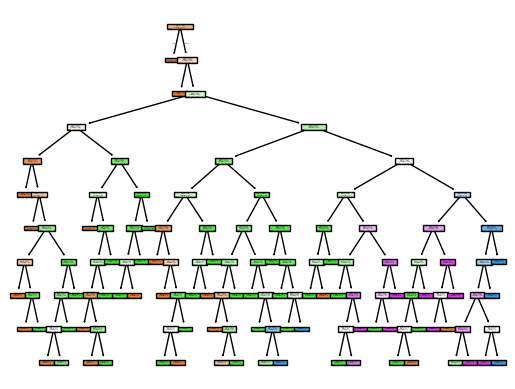

Misclassification samples: 8
580     False
1218    False
468     False
1284    False
980     False
        ...  
1719    False
105     False
561     False
852     False
1251    False
Name: Target, Length: 432, dtype: bool
Accuracy: 0.981


In [35]:
from sklearn import tree
feature_names = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()
y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

In [36]:
importances = tree_model.feature_importances_
root_feature = feature_names[np.argmax(importances)]
print(f'Feature selected for root node: {root_feature}')

Feature selected for root node: Col2


In [37]:
input_data = pd.DataFrame([[1, 3, 1, 2, 3, 2]], columns=feature_names)
print(f'Class probability: {tree_model.predict_proba(input_data)}')
print('Most probable class: %d' % tree_model.predict(input_data)[0])

Class probability: [[1. 0. 0. 0.]]
Most probable class: 1


---

# Convertir Jupyter Notebook a Fichero Python

In [38]:
! python .convert_notebook_to_script.py --input answer3.ipynb --output answer3.py

[NbConvertApp] Converting notebook answer3.ipynb to script
[NbConvertApp] Writing 5728 bytes to answer3.py
